In [230]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels
import statsmodels.api as sm
import statsmodels.formula as smf
from statsmodels.formula.api import ols

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import folium 

In [231]:
df = pd.read_csv('data/kc_house_data.csv')
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


In [232]:
# looking at the types of data 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [233]:
# see if there are any null values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [234]:
# dropping columns that is recommended to drop for me
#
#

In [235]:
df = df.drop(columns = ['view', 'sqft_above', 'sqft_basement', 'yr_renovated',
                        'sqft_living15', 'sqft_lot15'])

In [236]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode,lat,long
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1955,98178,47.5112,-122.257
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,98125,47.7210,-122.319
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,98028,47.7379,-122.233
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,98136,47.5208,-122.393
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,98074,47.6168,-122.045


In [237]:
df.isna().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
zipcode           0
lat               0
long              0
dtype: int64

In [238]:
# cleaning waterfront
#

In [239]:
# seeing what kind of values it has
df.waterfront.unique()

array([nan,  0.,  1.])

In [240]:
df.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [241]:
df.waterfront.isna().sum()

2376

In [242]:
# replaceing the nan values with 0
df.waterfront = df.waterfront.fillna(0)

In [243]:
# making sure it worked

df.waterfront.unique()

array([0., 1.])

In [244]:

df.waterfront.isna().sum()

0

In [245]:
df.isna().sum()

id             0
date           0
price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
condition      0
grade          0
yr_built       0
zipcode        0
lat            0
long           0
dtype: int64

In [246]:
#
#
# checking to see if there are any duplicate values

In [247]:
df.duplicated().sum()

0

In [248]:
#
#
# looking at the average house prices

In [249]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode,lat,long
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,3.409825,7.657915,1970.999676,98077.951845,47.560093,-122.213982
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.650546,1.173200,29.375234,53.513072,0.138552,0.140724
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,1900.000000,98001.000000,47.155900,-122.519000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1951.000000,98033.000000,47.471100,-122.328000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1975.000000,98065.000000,47.571800,-122.231000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,1997.000000,98118.000000,47.678000,-122.125000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,2015.000000,98199.000000,47.777600,-121.315000


In [250]:
#
# removing the houses that cost more than $850,000 so i can look at starter homes

In [251]:
df_low_prices = df.drop(df[df.price > 850000].index)
df_low_prices.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode,lat,long
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1955,98178,47.5112,-122.257
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,98125,47.7210,-122.319
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,98028,47.7379,-122.233
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,98136,47.5208,-122.393
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,98074,47.6168,-122.045


In [252]:
df_low_prices.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode,lat,long
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1955,98178,47.5112,-122.257
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,98125,47.7210,-122.319
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,98028,47.7379,-122.233
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,98136,47.5208,-122.393
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,98074,47.6168,-122.045


In [253]:
# looking at what the mean of the prices are now that we dropped the higher priced homes

df_low_prices.price.describe()

count     19165.000000
mean     444937.455622
std      171763.093232
min       78000.000000
25%      308000.000000
50%      422120.000000
75%      565000.000000
max      850000.000000
Name: price, dtype: float64

In [254]:
#
#
# making a month and a year column so i can see what time of year is the best time 
# to buy a house
# 

In [255]:
df_low_prices['date_dateformat'] = pd.to_datetime(df_low_prices['date'])

In [256]:
df_low_prices['month'] = df_low_prices.date_dateformat.dt.month

In [257]:
df_low_prices['year'] = df_low_prices.date_dateformat.dt.year

In [258]:
df_low_prices['age_sold'] = df_low_prices['year'] - df_low_prices['yr_built']

In [259]:
#
# looking at the average age, youngest age and the oldest age of houses sold 

In [260]:
df_low_prices.age_sold.describe()

count    19165.000000
mean        43.699713
std         28.927806
min         -1.000000
25%         19.000000
50%         41.000000
75%         63.000000
max        115.000000
Name: age_sold, dtype: float64

In [261]:
# the average age of houses sold was 43 years old
# the youngest house sold was -1 so it was bought before it was even built
# the oldest house was 115 years old

In [262]:
df_low_prices.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode,lat,long,date_dateformat,month,year,age_sold
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1955,98178,47.5112,-122.257,2014-10-13,10,2014,59
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,98125,47.7210,-122.319,2014-12-09,12,2014,63
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,98028,47.7379,-122.233,2015-02-25,2,2015,82
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,98136,47.5208,-122.393,2014-12-09,12,2014,49
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,98074,47.6168,-122.045,2015-02-18,2,2015,28


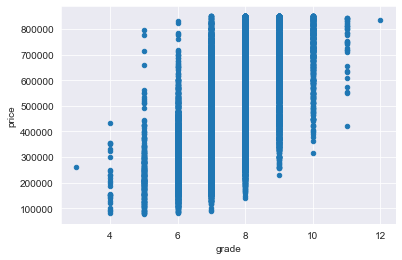

In [263]:
df_low_prices.plot.scatter(x = 'grade', y = 'price')

In [264]:
df_months = df.groupby(by = df_low_prices.month).mean()

In [265]:
df_months.head(12)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode,lat,long
month,,,,,,,,,,,,,,
1.0,4.544011e+09,432717.713311,3.335609,2.020193,1908.313993,14216.822526,1.441411,0.003413,3.348123,7.405006,1970.558589,98079.568828,47.545334,-122.214824
2.0,4.628168e+09,428202.557624,3.286348,1.963652,1861.281028,13000.993794,1.437057,0.001773,3.403369,7.362589,1970.830674,98077.853723,47.539557,-122.216631
3.0,4.621795e+09,444789.657592,3.276467,1.954779,1851.949788,14081.466425,1.426195,0.000605,3.339988,7.366606,1970.441621,98078.479734,47.544155,-122.213073
4.0,4.729054e+09,457891.300775,3.284755,1.993282,1869.603618,13143.885271,1.452972,0.002067,3.355556,7.406202,1971.288372,98079.809302,47.551957,-122.213341
5.0,4.672661e+09,449510.722795,3.271107,2.002111,1899.670263,15721.538931,1.453565,0.001407,3.412758,7.437148,1970.184803,98080.196060,47.557722,-122.214100
6.0,4.626459e+09,453561.519979,3.330179,2.044821,1933.896425,13654.105152,1.471083,0.002629,3.449527,7.488433,1970.431651,98080.968454,47.557631,-122.213674
7.0,4.627296e+09,452051.876594,3.314125,2.031234,1938.160122,13212.214686,1.483937,0.001530,3.435492,7.494136,1971.447731,98075.436512,47.553493,-122.206672
8.0,4.624538e+09,442707.637420,3.271935,2.012929,1899.233004,13676.805927,1.459326,0.001162,3.438117,7.444509,1971.271354,98077.887275,47.557798,-122.210114
9.0,4.533074e+09,447155.970680,3.297567,2.049127,1929.390518,14743.004367,1.462882,0.002495,3.420462,7.457268,1970.804117,98078.827199,47.554384,-122.211638


In [266]:
months = []
for value in df_low_prices['month']:
    if value == 1:
        months.append('Jan')
    elif value == 2:
        months.append('Feb')
    elif value == 3:
        months.append('Mar')
    elif value == 4:
        months.append('Apr')
    elif value == 5:
        months.append('May')
    elif value == 6:
        months.append('Jun')
    elif value == 7:
        months.append('Jul')
    elif value == 8:
        months.append('Aug')
    elif value == 9:
        months.append('Sep')
    elif value == 10:
        months.append('Oct')
    elif value == 11:
        months.append('Nov')
    elif value == 12:
        months.append('Dec')
        
df_low_prices['name_of_month'] = months
df_low_prices.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode,lat,long,date_dateformat,month,year,age_sold,name_of_month
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1955,98178,47.5112,-122.257,2014-10-13,10,2014,59,Oct
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,98125,47.7210,-122.319,2014-12-09,12,2014,63,Dec
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,98028,47.7379,-122.233,2015-02-25,2,2015,82,Feb
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,98136,47.5208,-122.393,2014-12-09,12,2014,49,Dec
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,98074,47.6168,-122.045,2015-02-18,2,2015,28,Feb


In [267]:
#
# making Seasons from the name_of_month column

In [268]:
seasons = []
for value in df_low_prices['month']:
    if value >= 12:
        seasons.append('winter')
    elif 1 <= value <= 2:
        seasons.append('winter')
    elif 3 <= value <= 5:
        seasons.append('spring')
    elif 6 <= value <= 8:
        seasons.append('summer')
    else:
        seasons.append('fall')
        
df_low_prices['seasons'] = seasons
df_low_prices.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,yr_built,zipcode,lat,long,date_dateformat,month,year,age_sold,name_of_month,seasons
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,...,1955,98178,47.5112,-122.257,2014-10-13,10,2014,59,Oct,fall
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,...,1951,98125,47.7210,-122.319,2014-12-09,12,2014,63,Dec,winter
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,...,1933,98028,47.7379,-122.233,2015-02-25,2,2015,82,Feb,winter
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,...,1965,98136,47.5208,-122.393,2014-12-09,12,2014,49,Dec,winter
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,...,1987,98074,47.6168,-122.045,2015-02-18,2,2015,28,Feb,winter


In [269]:
df_seasons = df_low_prices[['seasons', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
                'condition', 'yr_built', 'lat', 'long', 'month', 'name_of_month', 'age_sold']]

In [270]:
df_seasons.head()

,seasons,price,bedrooms,bathrooms,sqft_living,condition,yr_built,lat,long,month,name_of_month,age_sold
0,fall,221900.0,3,1.00,1180,3,1955,47.5112,-122.257,10,Oct,59
1,winter,538000.0,3,2.25,2570,3,1951,47.7210,-122.319,12,Dec,63
2,winter,180000.0,2,1.00,770,3,1933,47.7379,-122.233,2,Feb,82
3,winter,604000.0,4,3.00,1960,5,1965,47.5208,-122.393,12,Dec,49
4,winter,510000.0,3,2.00,1680,3,1987,47.6168,-122.045,2,Feb,28


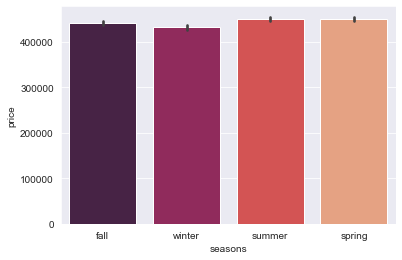

In [271]:
sns.barplot(x = 'seasons', y = 'price', data = df_seasons, palette = 'rocket')

In [272]:
# it looks like the best time to buy a house would be in the winter with the lower house prices
#
#

In [273]:
#
# looking at which variables have the highest correlation to price

In [274]:
df_low_prices.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode,lat,long,month,year,age_sold
id,1.000000,0.030206,0.013125,0.035400,0.020783,-0.133586,0.035880,-0.005562,-0.032570,0.046707,0.031457,-0.006202,0.006256,0.022478,-0.008929,0.006030,-0.031357
price,0.030206,1.000000,0.257992,0.407053,0.556399,0.086551,0.253063,0.037831,0.030340,0.575285,0.060310,-0.007422,0.458220,0.083716,-0.009441,-0.001059,-0.060321
bedrooms,0.013125,0.257992,1.000000,0.477493,0.588292,0.020765,0.139866,-0.031407,0.025770,0.294993,0.163020,-0.150498,-0.051498,0.140380,-0.001265,-0.008353,-0.163140
bathrooms,0.035400,0.407053,0.477493,1.000000,0.698601,0.047361,0.500866,-0.022380,-0.139863,0.590919,0.565395,-0.217562,-0.037785,0.251052,0.011783,-0.029508,-0.565818
sqft_living,0.020783,0.556399,0.588292,0.698601,1.000000,0.145016,0.319995,-0.007335,-0.073409,0.661542,0.360336,-0.214556,-0.033978,0.289808,0.016407,-0.031466,-0.360810
sqft_lot,-0.133586,0.086551,0.020765,0.047361,0.145016,1.000000,-0.028619,0.014841,0.002946,0.072397,0.030224,-0.132182,-0.102762,0.217895,0.004467,-0.001804,-0.030250
floors,0.035880,0.253063,0.139866,0.500866,0.319995,-0.028619,1.000000,-0.013723,-0.280315,0.450019,0.524815,-0.071010,0.021242,0.135368,0.015374,-0.023710,-0.525149
waterfront,-0.005562,0.037831,-0.031407,-0.022380,-0.007335,0.014841,-0.013723,1.000000,0.011290,-0.018046,-0.037960,0.036988,-0.040195,-0.054421,0.006710,-0.006329,0.037854
condition,-0.032570,0.030340,0.025770,-0.139863,-0.073409,0.002946,-0.280315,0.011290,1.000000,-0.179681,-0.346129,-0.007579,-0.020145,-0.091013,0.022687,-0.045190,0.345366
grade,0.046707,0.575285,0.294993,0.590919,0.661542,0.072397,0.450019,-0.018046,-0.179681,1.000000,0.515322,-0.191178,0.050905,0.227845,0.018948,-0.038838,-0.515901


In [275]:
# sqft_living, grade, and bathrooms have the highest correlation to price
#

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb33d059198>,
      dtype=object)

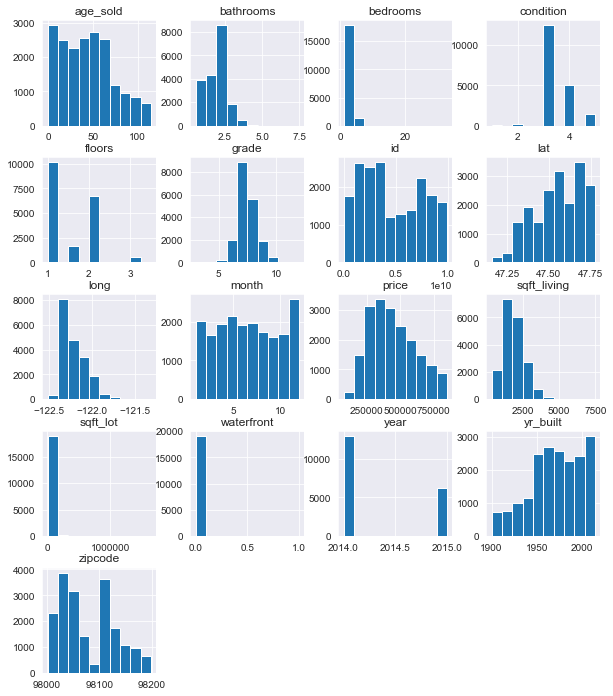

In [276]:
df_low_prices.hist(figsize = (10,12))

In [277]:
#
#
# making a base linear regression model

In [278]:
df_original = pd.read_csv('data/kc_house_data.csv')

In [279]:
outcome = 'price'

x_col = df_original.dropna().drop(['price', 'sqft_basement', 'id', 'date', 'sqft_above',
                                  'sqft_living15'], axis = 1).columns


In [280]:
x_col

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_lot15'],
      dtype='object')

In [281]:
predictors = '+'.join(x_col)
predictors

'bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+yr_built+yr_renovated+zipcode+lat+long+sqft_lot15'

In [282]:
f = outcome + '~' + predictors
f

'price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+yr_built+yr_renovated+zipcode+lat+long+sqft_lot15'

In [283]:
model_base = ols(formula = f, data = df_original).fit()
model_base.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     2446.
Date:                Mon, 25 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:51:13   Log-Likelihood:            -2.1507e+05
No. Observations:               15762   AIC:                         4.302e+05
Df Residuals:                   15746   BIC:                         4.303e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.243e+07   3.38e+06      3.682      0.000    5.81e+06    1.91e+07
bedrooms     -3.782e+04   2224.734    -16.998      0.000   -4.22e+04   -3.35e+04
bathrooms     3.944e+04   3824.310     10.314      0.000    3.19e+04    4.69e+04
sqft_living    186.5146      3.678     50.714      0.000     179.306     193.723
sqft_lot         0.0905      0.056      1.609      0.108      -0.020       0.201
floors        1.704e+04   3826.392      4.452      0.000    9534.917    2.45e+04
waterfront    6.131e+05   2.06e+04     29.791      0.000    5.73e+05    6.53e+05
view          5.149e+04   2505.480     20.551      0.000    4.66e+04    5.64e+04
condition     2.423e+04   2780.223      8.714      0.000    1.88e+04    2.97e+04
grade         1.006e+05   2412.252     41.688      0.000    9.58e+04    1.05e+05
yr_built     -2701.0478     86.085    -31.376      0.000   -2869.785   -2532.310
yr_renovated    18.4269      4.371      4.215      0.000       9.858      26.995
zipcode       -596.7359     38.978    -15.310      0.000    -673.136    -520.335
lat           5.953e+05   1.26e+04     47.065      0.000    5.71e+05     6.2e+05
long         -1.833e+05   1.51e+04    -12.143      0.000   -2.13e+05   -1.54e+05
sqft_lot15      -0.3093      0.085     -3.651      0.000      -0.475      -0.143
==============================================================================
Omnibus:                    13686.966   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1479753.525
Skew:                           3.667   Prob(JB):                         0.00
Kurtosis:                      49.897   Cond. No.                     2.09e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [284]:
#
#
# making a regression model off of df_low_prices

In [285]:
df_low_prices.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,yr_built,zipcode,lat,long,date_dateformat,month,year,age_sold,name_of_month,seasons
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,...,1955,98178,47.5112,-122.257,2014-10-13,10,2014,59,Oct,fall
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,...,1951,98125,47.7210,-122.319,2014-12-09,12,2014,63,Dec,winter
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,...,1933,98028,47.7379,-122.233,2015-02-25,2,2015,82,Feb,winter
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,...,1965,98136,47.5208,-122.393,2014-12-09,12,2014,49,Dec,winter
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,...,1987,98074,47.6168,-122.045,2015-02-18,2,2015,28,Feb,winter


In [286]:
outcome = 'price'

xcols = df_low_prices.dropna().drop(['price', 'id', 'date', 'date_dateformat', 
                                     'seasons', 'name_of_month', 'month', 'year',
                                    'age_sold'], axis = 1).columns


In [287]:
xcols

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'yr_built', 'zipcode', 'lat',
       'long'],
      dtype='object')

In [288]:
predictors = '+'.join(xcols)
predictors

'bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+condition+grade+yr_built+zipcode+lat+long'

In [289]:
f = outcome + '~' + predictors
f

'price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+condition+grade+yr_built+zipcode+lat+long'

In [290]:
model_1 = ols(formula = f, data = df_low_prices).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     2944.
Date:                Mon, 25 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:51:20   Log-Likelihood:            -2.4819e+05
No. Observations:               19165   AIC:                         4.964e+05
Df Residuals:                   19152   BIC:                         4.965e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.982e+06   1.52e+06     -3.288      0.001   -7.95e+06   -2.01e+06
bedrooms    -1.022e+04   1047.878     -9.750      0.000   -1.23e+04   -8162.409
bathrooms    2.279e+04   1795.344     12.692      0.000    1.93e+04    2.63e+04
sqft_living    80.4674      1.868     43.079      0.000      76.806      84.129
sqft_lot        0.2329      0.020     11.461      0.000       0.193       0.273
floors       2.668e+04   1753.473     15.216      0.000    2.32e+04    3.01e+04
waterfront   2.149e+05   1.64e+04     13.108      0.000    1.83e+05    2.47e+05
condition    2.057e+04   1247.200     16.496      0.000    1.81e+04     2.3e+04
grade        7.187e+04   1168.172     61.522      0.000    6.96e+04    7.42e+04
yr_built    -1634.3103     38.933    -41.978      0.000   -1710.622   -1557.998
zipcode      -152.2766     17.587     -8.659      0.000    -186.748    -117.805
lat          5.112e+05   5509.470     92.785      0.000       5e+05    5.22e+05
long         1.258e+04   6675.473      1.885      0.059    -500.649    2.57e+04
==============================================================================
Omnibus:                      705.348   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.502
Skew:                           0.395   Prob(JB):                    2.65e-204
Kurtosis:                       3.742   Cond. No.                     2.04e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [291]:
#
#
# making dummies for grade

In [292]:
df_grade = pd.get_dummies(df_low_prices['grade'], prefix = 'grade', drop_first = True)

In [293]:
df2 = pd.concat([df_low_prices, df_grade], axis = 1)

In [294]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19165 entries, 0 to 21596
Data columns (total 30 columns):
id                 19165 non-null int64
date               19165 non-null object
price              19165 non-null float64
bedrooms           19165 non-null int64
bathrooms          19165 non-null float64
sqft_living        19165 non-null int64
sqft_lot           19165 non-null int64
floors             19165 non-null float64
waterfront         19165 non-null float64
condition          19165 non-null int64
grade              19165 non-null int64
yr_built           19165 non-null int64
zipcode            19165 non-null int64
lat                19165 non-null float64
long               19165 non-null float64
date_dateformat    19165 non-null datetime64[ns]
month              19165 non-null int64
year               19165 non-null int64
age_sold           19165 non-null int64
name_of_month      19165 non-null object
seasons            19165 non-null object
grade_4            19165 no

In [295]:
df2 = df2.drop(['date_dateformat', 'age_sold', 'name_of_month' , 'seasons'], axis = 1)
df2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,year,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,...,2014,0,0,0,1,0,0,0,0,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,...,2014,0,0,0,1,0,0,0,0,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,...,2015,0,0,1,0,0,0,0,0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,...,2014,0,0,0,1,0,0,0,0,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,...,2015,0,0,0,0,1,0,0,0,0


In [296]:
outcome = 'price'
xcols = df2.dropna().drop(['price', 'id', 'date', 'grade', 'month', 'year','yr_built',], axis = 1).columns

predictors = '+'.join(xcols)

f = outcome + '~' + predictors

model_grade_dummies = ols(formula = f, data = df2).fit()
model_grade_dummies.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     1642.
Date:                Mon, 25 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:51:23   Log-Likelihood:            -2.4894e+05
No. Observations:               19165   AIC:                         4.979e+05
Df Residuals:                   19145   BIC:                         4.981e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.756e+07   1.48e+06    -18.602      0.000   -3.05e+07   -2.47e+07
bedrooms    -6097.0253   1100.932     -5.538      0.000   -8254.948   -3939.103
bathrooms    -560.9794   1790.853     -0.313      0.754   -4071.210    2949.251
sqft_living    90.3669      1.948     46.399      0.000      86.549      94.184
sqft_lot        0.2755      0.021     13.041      0.000       0.234       0.317
floors       5895.7703   1780.398      3.311      0.001    2406.034    9385.506
waterfront   2.225e+05   1.71e+04     13.041      0.000    1.89e+05    2.56e+05
condition    3.503e+04   1253.206     27.949      0.000    3.26e+04    3.75e+04
zipcode       -60.8604     18.208     -3.342      0.001     -96.550     -25.170
lat          5.551e+05   5649.980     98.253      0.000    5.44e+05    5.66e+05
long        -6.034e+04   6777.193     -8.903      0.000   -7.36e+04   -4.71e+04
grade_4     -1.642e+05   1.08e+05     -1.521      0.128   -3.76e+05    4.74e+04
grade_5     -1.714e+05   1.06e+05     -1.613      0.107    -3.8e+05    3.68e+04
grade_6     -1.549e+05   1.06e+05     -1.461      0.144   -3.63e+05     5.3e+04
grade_7     -1.077e+05   1.06e+05     -1.015      0.310   -3.16e+05       1e+05
grade_8     -4.243e+04   1.06e+05     -0.400      0.689    -2.5e+05    1.65e+05
grade_9      3.489e+04   1.06e+05      0.329      0.742   -1.73e+05    2.43e+05
grade_10     8.116e+04   1.06e+05      0.764      0.445   -1.27e+05    2.89e+05
grade_11     8.716e+04   1.08e+05      0.810      0.418   -1.24e+05    2.98e+05
grade_12     1.956e+05    1.5e+05      1.304      0.192   -9.85e+04     4.9e+05
==============================================================================
Omnibus:                      901.197   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1120.254
Skew:                           0.496   Prob(JB):                    5.50e-244
Kurtosis:                       3.648   Cond. No.                     1.92e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [297]:
data = df_low_prices.drop(['date_dateformat', 'month', 'year', 'age_sold', 'seasons',
                          'name_of_month','yr_built'], axis = 1)

In [298]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19165 entries, 0 to 21596
Data columns (total 14 columns):
id             19165 non-null int64
date           19165 non-null object
price          19165 non-null float64
bedrooms       19165 non-null int64
bathrooms      19165 non-null float64
sqft_living    19165 non-null int64
sqft_lot       19165 non-null int64
floors         19165 non-null float64
waterfront     19165 non-null float64
condition      19165 non-null int64
grade          19165 non-null int64
zipcode        19165 non-null int64
lat            19165 non-null float64
long           19165 non-null float64
dtypes: float64(6), int64(7), object(1)
memory usage: 2.8+ MB


In [299]:
y = data['price']
X = data.drop(['price', 'id', 'date'], axis = 1)

In [300]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [301]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [302]:
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [303]:
mse_train = mean_squared_error(y_train, y_hat_train)
mse_test = mean_squared_error(y_test, y_hat_test)

In [304]:
print('MSE Train:', mse_train)
print('MSE Test:', mse_test)

MSE Train: 11244227554.342262
MSE Test: 11654123908.96862


In [305]:
print('RMSE Train:', np.sqrt(mse_train))
print('RMSE Test:', np.sqrt(mse_test))

RMSE Train: 106038.80211668869
RMSE Test: 107954.26767371738


In [306]:
r2_score(y_test, y_hat_test)

0.6017664841204036

In [307]:
residuals = (y_test - y_hat_test)

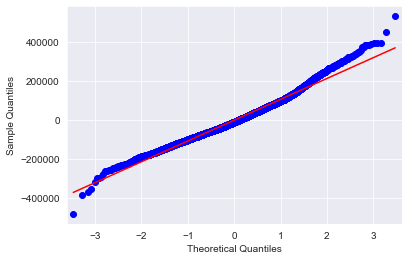

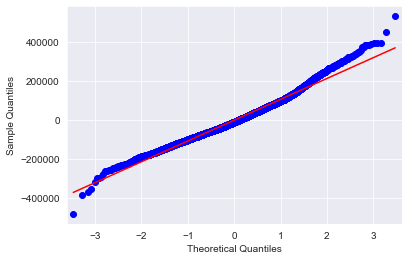

In [308]:
statsmodels.graphics.gofplots.qqplot(residuals, line = 'r')

In [309]:
np.sqrt(mse_test) / df_low_prices.price.mean()

0.24262796109791984

In [310]:
#
#
# binning the grade column

In [311]:
df_low_prices['grade_bin'] = pd.cut(df_low_prices['grade'], bins = [0,6,7,8,13], 
                                   labels = ['D', 'C', 'B', 'A'])

In [312]:
df_low_prices.grade_bin.value_counts()

C    8868
B    5627
A    2371
D    2299
Name: grade_bin, dtype: int64

In [313]:
df_low_prices.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,zipcode,lat,long,date_dateformat,month,year,age_sold,name_of_month,seasons,grade_bin
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,...,98178,47.5112,-122.257,2014-10-13,10,2014,59,Oct,fall,C
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,...,98125,47.7210,-122.319,2014-12-09,12,2014,63,Dec,winter,C
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,...,98028,47.7379,-122.233,2015-02-25,2,2015,82,Feb,winter,D
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,...,98136,47.5208,-122.393,2014-12-09,12,2014,49,Dec,winter,C
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,...,98074,47.6168,-122.045,2015-02-18,2,2015,28,Feb,winter,B


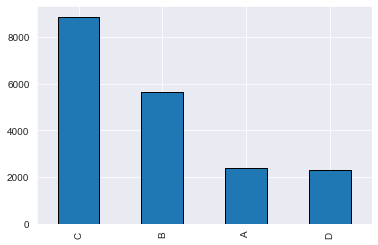

In [314]:
sns.set_style('darkgrid')
df_low_prices.grade_bin.value_counts().plot.bar(edgecolor = 'black')

In [315]:
df_low_prices.grade_bin.unique()

[C, D, B, A]
Categories (4, object): [D < C < B < A]

In [316]:
df_low_prices.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,zipcode,lat,long,date_dateformat,month,year,age_sold,name_of_month,seasons,grade_bin
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,...,98178,47.5112,-122.257,2014-10-13,10,2014,59,Oct,fall,C
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,...,98125,47.7210,-122.319,2014-12-09,12,2014,63,Dec,winter,C
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,...,98028,47.7379,-122.233,2015-02-25,2,2015,82,Feb,winter,D
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,...,98136,47.5208,-122.393,2014-12-09,12,2014,49,Dec,winter,C
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,...,98074,47.6168,-122.045,2015-02-18,2,2015,28,Feb,winter,B


In [317]:
df_low_prices.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,zipcode,lat,long,date_dateformat,month,year,age_sold,name_of_month,seasons,grade_bin
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,...,98178,47.5112,-122.257,2014-10-13,10,2014,59,Oct,fall,C
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,...,98125,47.7210,-122.319,2014-12-09,12,2014,63,Dec,winter,C
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,...,98028,47.7379,-122.233,2015-02-25,2,2015,82,Feb,winter,D
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,...,98136,47.5208,-122.393,2014-12-09,12,2014,49,Dec,winter,C
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,...,98074,47.6168,-122.045,2015-02-18,2,2015,28,Feb,winter,B


In [318]:
#
#
# making a model from the graded bins

In [319]:
outcome = 'price'

xcols = df_low_prices.dropna().drop(['price','id','date','date_dateformat','month','year',
                                       'age_sold','name_of_month','seasons'], axis = 1).columns
xcols

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'yr_built', 'zipcode', 'lat',
       'long', 'grade_bin'],
      dtype='object')

In [320]:
predictors = '+'.join(xcols)

f = outcome + '~' + predictors

model_grade_bin = ols(formula = f, data = df_low_prices).fit()
model_grade_bin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     2382.
Date:                Mon, 25 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:51:39   Log-Likelihood:            -2.4812e+05
No. Observations:               19165   AIC:                         4.963e+05
Df Residuals:                   19149   BIC:                         4.964e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -5.543e+06   1.51e+06     -3.669      0.000    -8.5e+06   -2.58e+06
grade_bin[T.C]  3.276e+04   4752.023      6.895      0.000    2.34e+04    4.21e+04
grade_bin[T.B]  7.577e+04   8130.852      9.319      0.000    5.98e+04    9.17e+04
grade_bin[T.A]  1.283e+05   1.25e+04     10.291      0.000    1.04e+05    1.53e+05
bedrooms       -9346.1104   1053.840     -8.869      0.000   -1.14e+04   -7280.491
bathrooms       2.322e+04   1807.029     12.848      0.000    1.97e+04    2.68e+04
sqft_living       78.7813      1.884     41.821      0.000      75.089      82.474
sqft_lot           0.2291      0.020     11.312      0.000       0.189       0.269
floors           2.45e+04   1762.492     13.902      0.000     2.1e+04     2.8e+04
waterfront      2.107e+05   1.63e+04     12.893      0.000    1.79e+05    2.43e+05
condition       2.105e+04   1244.992     16.905      0.000    1.86e+04    2.35e+04
grade           3.529e+04   3617.361      9.756      0.000    2.82e+04    4.24e+04
yr_built       -1632.9963     39.059    -41.809      0.000   -1709.555   -1556.438
zipcode         -148.9926     17.562     -8.484      0.000    -183.416    -114.569
lat             5.112e+05   5509.093     92.801      0.000       5e+05    5.22e+05
long            8869.4302   6688.390      1.326      0.185   -4240.403     2.2e+04
==============================================================================
Omnibus:                      664.087   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              883.379
Skew:                           0.378   Prob(JB):                    1.50e-192
Kurtosis:                       3.730   Cond. No.                     2.05e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [321]:
#
#
# making qqplot from binned grade

In [322]:
df_low_prices.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,zipcode,lat,long,date_dateformat,month,year,age_sold,name_of_month,seasons,grade_bin
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,...,98178,47.5112,-122.257,2014-10-13,10,2014,59,Oct,fall,C
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,...,98125,47.7210,-122.319,2014-12-09,12,2014,63,Dec,winter,C
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,...,98028,47.7379,-122.233,2015-02-25,2,2015,82,Feb,winter,D
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,...,98136,47.5208,-122.393,2014-12-09,12,2014,49,Dec,winter,C
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,...,98074,47.6168,-122.045,2015-02-18,2,2015,28,Feb,winter,B


Train MSE: 10378585722.340864
Test MSE: 10356218490.096106
Train RMSE: 101875.34403544787
Test RMSE: 101765.5073691283


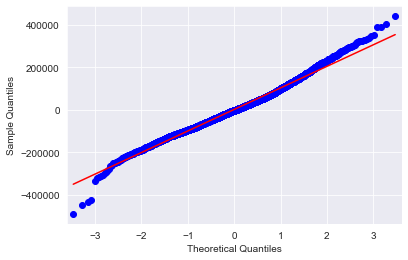

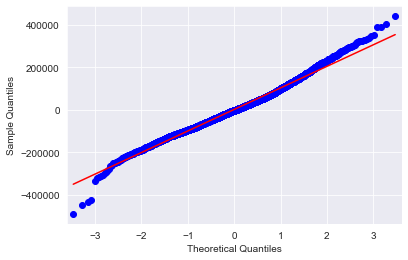

In [323]:
data = df_low_prices.copy()

y = data['price']
X = data.drop(['price','id','date','date_dateformat','month','year','grade_bin',
                                       'age_sold','name_of_month','seasons'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

mse_train = mean_squared_error(y_train, y_hat_train)
mse_test = mean_squared_error(y_test, y_hat_test)

print('Train MSE:', mse_train)
print('Test MSE:', mse_test)

print('Train RMSE:', np.sqrt(mse_train))
print('Test RMSE:', np.sqrt(mse_test))

r2_score(y_test, y_hat_test)

residuals = (y_test - y_hat_test)

statsmodels.graphics.gofplots.qqplot(residuals, line = 'r')

In [324]:
#
#
# getting dummies for zipcodes

In [325]:
zipcodes = pd.get_dummies(df_original['zipcode'], prefix = 'zipcode')

In [326]:
zipcodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 70 columns):
zipcode_98001    21597 non-null uint8
zipcode_98002    21597 non-null uint8
zipcode_98003    21597 non-null uint8
zipcode_98004    21597 non-null uint8
zipcode_98005    21597 non-null uint8
zipcode_98006    21597 non-null uint8
zipcode_98007    21597 non-null uint8
zipcode_98008    21597 non-null uint8
zipcode_98010    21597 non-null uint8
zipcode_98011    21597 non-null uint8
zipcode_98014    21597 non-null uint8
zipcode_98019    21597 non-null uint8
zipcode_98022    21597 non-null uint8
zipcode_98023    21597 non-null uint8
zipcode_98024    21597 non-null uint8
zipcode_98027    21597 non-null uint8
zipcode_98028    21597 non-null uint8
zipcode_98029    21597 non-null uint8
zipcode_98030    21597 non-null uint8
zipcode_98031    21597 non-null uint8
zipcode_98032    21597 non-null uint8
zipcode_98033    21597 non-null uint8
zipcode_98034    21597 non-null uint8
zipcode_98038    

In [327]:
df_zipcodes = pd.concat([df_low_prices, zipcodes], axis = 1)

In [328]:
#
#
# making zipcodes into four sectors on the map trying to make each sector a corner of the map

In [329]:
df_zipcodes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21596
Data columns (total 92 columns):
id                 19165 non-null float64
date               19165 non-null object
price              19165 non-null float64
bedrooms           19165 non-null float64
bathrooms          19165 non-null float64
sqft_living        19165 non-null float64
sqft_lot           19165 non-null float64
floors             19165 non-null float64
waterfront         19165 non-null float64
condition          19165 non-null float64
grade              19165 non-null float64
yr_built           19165 non-null float64
zipcode            19165 non-null float64
lat                19165 non-null float64
long               19165 non-null float64
date_dateformat    19165 non-null datetime64[ns]
month              19165 non-null float64
year               19165 non-null float64
age_sold           19165 non-null float64
name_of_month      19165 non-null object
seasons            19165 non-null object
grade

In [330]:
df_zipcodes['lat_long'] = list(zip(df_zipcodes.lat, df_zipcodes.long))

In [331]:
df_zipcodes['sector'] = df_zipcodes['lat_long'].apply(lambda x: 'sector_1' if (x[0] >= 47.5) & (x[1] < -122.2)
                           else ('sector_2' if (x[0] >= 47.5) & (x[1] >=-122.2)
                           else ('sector_3' if (x[0] < 47.5) & (x[1] < -122.2)
                           else 'sector_4')))

In [332]:
df_zipcodes.sector.value_counts()

sector_1    7758
sector_4    5923
sector_2    4867
sector_3    3049
Name: sector, dtype: int64

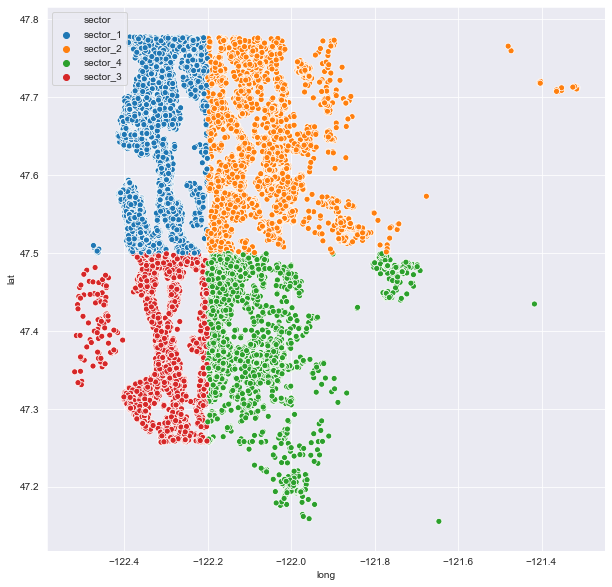

In [333]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = 'long', y = 'lat', hue = 'sector', data = df_zipcodes)

In [334]:
df_zipcodes.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,lat_long,sector
0,7.129301e+09,10/13/2014,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,3.0,...,0,0,0,0,1,0,0,0,"(47.5112, -122.257)",sector_1
1,6.414100e+09,12/9/2014,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,3.0,...,0,0,0,0,0,0,0,0,"(47.721000000000004, -122.319)",sector_1
2,5.631500e+09,2/25/2015,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,3.0,...,0,0,0,0,0,0,0,0,"(47.7379, -122.23299999999999)",sector_1
3,2.487201e+09,12/9/2014,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,5.0,...,0,0,0,0,0,0,0,0,"(47.5208, -122.39299999999999)",sector_1
4,1.954401e+09,2/18/2015,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,3.0,...,0,0,0,0,0,0,0,0,"(47.6168, -122.045)",sector_2


In [335]:
#
#
# finding what the price per sqft is per zipcode

In [336]:


df_low_prices['sqft_price'] = df_low_prices['price'] / df_low_prices['sqft_living']

zip_mean = df_low_prices.groupby('zipcode').mean()
zip_mean

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,lat,long,month,year,age_sold,sqft_price
zipcode,,,,,,,,,,,,,,,,,
98001,4.651274e+09,281194.869806,3.393352,2.011773,1903.783934,14967.002770,1.430748,0.000000,3.335180,7.296399,1980.867036,47.309106,-122.270704,6.567867,2014.321330,33.454294,151.347966
98002,4.850894e+09,234284.035176,3.326633,1.839196,1627.743719,7517.633166,1.334171,0.000000,3.743719,6.693467,1967.773869,47.308780,-122.213357,6.698492,2014.336683,46.562814,151.174091
98003,4.689068e+09,291760.422939,3.354839,2.040323,1915.598566,10606.351254,1.308244,0.000000,3.372760,7.534050,1976.763441,47.315658,-122.309968,6.602151,2014.344086,37.580645,157.072283
98004,4.275247e+09,724470.439024,3.353659,1.743902,1757.439024,10379.463415,1.195122,0.000000,3.597561,7.402439,1959.390244,47.610707,-122.198963,6.743902,2014.268293,54.878049,447.904335
98005,5.366156e+09,675091.867257,3.716814,2.192478,2231.061947,13619.663717,1.159292,0.000000,3.725664,7.964602,1966.592920,47.604085,-122.168602,6.787611,2014.300885,47.707965,314.630707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98177,4.026798e+09,521969.447115,3.298077,1.909856,2003.942308,9577.644231,1.221154,0.000000,3.461538,7.600962,1959.427885,47.743174,-122.367880,6.692308,2014.278846,54.850962,275.104589
98178,4.276430e+09,300044.563707,3.305019,1.718147,1717.413127,8242.888031,1.179537,0.023166,3.324324,6.799228,1955.065637,47.499003,-122.247054,6.895753,2014.293436,59.227799,186.208846
98188,4.481851e+09,289078.345588,3.433824,1.863971,1802.772059,10126.080882,1.227941,0.000000,3.330882,7.036765,1965.507353,47.447310,-122.280993,6.205882,2014.389706,48.882353,169.007306


In [337]:
df_low_prices.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,lat,long,date_dateformat,month,year,age_sold,name_of_month,seasons,grade_bin,sqft_price
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,...,47.5112,-122.257,2014-10-13,10,2014,59,Oct,fall,C,188.050847
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,...,47.7210,-122.319,2014-12-09,12,2014,63,Dec,winter,C,209.338521
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,...,47.7379,-122.233,2015-02-25,2,2015,82,Feb,winter,D,233.766234
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,...,47.5208,-122.393,2014-12-09,12,2014,49,Dec,winter,C,308.163265
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,...,47.6168,-122.045,2015-02-18,2,2015,28,Feb,winter,B,303.571429


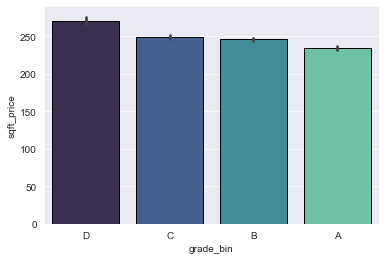

In [338]:
sns.set_style('darkgrid')
sns.barplot(x = 'grade_bin', y = 'sqft_price', data = df_low_prices, palette = 'mako',edgecolor = 'black')

In [339]:
outcome = 'price'
xcols = df_low_prices.drop(['price', 'id', 'date', 'date_dateformat', 'month', 'year', 'age_sold',
                         'name_of_month', 'seasons'], axis = 1).columns
predictors = '+'.join(xcols)

f = outcome + '~' + predictors


In [340]:
model_zip = ols(formula = f, data = df_low_prices).fit()
model_zip.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                 1.027e+04
Date:                Mon, 25 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:51:56   Log-Likelihood:            -2.3655e+05
No. Observations:               19165   AIC:                         4.731e+05
Df Residuals:                   19148   BIC:                         4.733e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.596e+06   8.27e+05      1.930      0.054    -2.5e+04    3.22e+06
grade_bin[T.C]  1.646e+04   2600.186      6.329      0.000    1.14e+04    2.16e+04
grade_bin[T.B]  2.926e+04   4452.461      6.572      0.000    2.05e+04     3.8e+04
grade_bin[T.A]  4.115e+04   6829.250      6.025      0.000    2.78e+04    5.45e+04
bedrooms        5564.6367    580.665      9.583      0.000    4426.483    6702.790
bathrooms       1.276e+04    989.558     12.896      0.000    1.08e+04    1.47e+04
sqft_living      172.4137      1.121    153.787      0.000     170.216     174.611
sqft_lot           0.0410      0.011      3.691      0.000       0.019       0.063
floors          3024.9908    969.286      3.121      0.002    1125.105    4924.877
waterfront      4.022e+04   8973.793      4.482      0.000    2.26e+04    5.78e+04
condition       1.032e+04    682.811     15.109      0.000    8978.098    1.17e+04
grade           1.514e+04   1980.746      7.643      0.000    1.13e+04     1.9e+04
yr_built        -387.3486     22.157    -17.482      0.000    -430.779    -343.918
zipcode          -28.6866      9.622     -2.981      0.003     -47.547      -9.826
lat             1.425e+05   3479.908     40.946      0.000    1.36e+05    1.49e+05
long            4.261e+04   3661.579     11.637      0.000    3.54e+04    4.98e+04
sqft_price      1253.2141      5.917    211.816      0.000    1241.617    1264.811
==============================================================================
Omnibus:                     3950.900   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17351.057
Skew:                          -0.950   Prob(JB):                         0.00
Kurtosis:                       7.256   Cond. No.                     2.05e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [341]:
plt.scatter()

TypeError: scatter() missing 2 required positional arguments: 'x' and 'y'

In [342]:
#
#
# binning the zipcodes

In [343]:


df_low_prices['sqft_price'] = df_low_prices['price'] / df_low_prices['sqft_living']

zip_mean = df_low_prices.groupby('zipcode').mean()
zip_mean.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,lat,long,month,year,age_sold,sqft_price
zipcode,,,,,,,,,,,,,,,,,
98001,4.651274e+09,281194.869806,3.393352,2.011773,1903.783934,14967.002770,1.430748,0.0,3.335180,7.296399,1980.867036,47.309106,-122.270704,6.567867,2014.321330,33.454294,151.347966
98002,4.850894e+09,234284.035176,3.326633,1.839196,1627.743719,7517.633166,1.334171,0.0,3.743719,6.693467,1967.773869,47.308780,-122.213357,6.698492,2014.336683,46.562814,151.174091
98003,4.689068e+09,291760.422939,3.354839,2.040323,1915.598566,10606.351254,1.308244,0.0,3.372760,7.534050,1976.763441,47.315658,-122.309968,6.602151,2014.344086,37.580645,157.072283
98004,4.275247e+09,724470.439024,3.353659,1.743902,1757.439024,10379.463415,1.195122,0.0,3.597561,7.402439,1959.390244,47.610707,-122.198963,6.743902,2014.268293,54.878049,447.904335
98005,5.366156e+09,675091.867257,3.716814,2.192478,2231.061947,13619.663717,1.159292,0.0,3.725664,7.964602,1966.592920,47.604085,-122.168602,6.787611,2014.300885,47.707965,314.630707


In [344]:
df_low_prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19165 entries, 0 to 21596
Data columns (total 23 columns):
id                 19165 non-null int64
date               19165 non-null object
price              19165 non-null float64
bedrooms           19165 non-null int64
bathrooms          19165 non-null float64
sqft_living        19165 non-null int64
sqft_lot           19165 non-null int64
floors             19165 non-null float64
waterfront         19165 non-null float64
condition          19165 non-null int64
grade              19165 non-null int64
yr_built           19165 non-null int64
zipcode            19165 non-null int64
lat                19165 non-null float64
long               19165 non-null float64
date_dateformat    19165 non-null datetime64[ns]
month              19165 non-null int64
year               19165 non-null int64
age_sold           19165 non-null int64
name_of_month      19165 non-null object
seasons            19165 non-null object
grade_bin          19165 no

In [345]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [346]:
# 
# 
# separating categorical and continuous values

In [347]:
continuous = []
categorical = []

In [348]:
for col in df.columns:
    if (df[col].nunique() < 25):
        categorical.append(col)
    else:
        continuous.append(col)

In [349]:
continuous

['id',
 'date',
 'price',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'yr_built',
 'zipcode',
 'lat',
 'long']

In [350]:
categorical

['bedrooms', 'floors', 'waterfront', 'condition', 'grade']

In [351]:
df_continuous = df.loc[:, continuous]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb33b65a160>,
      dtype=object)

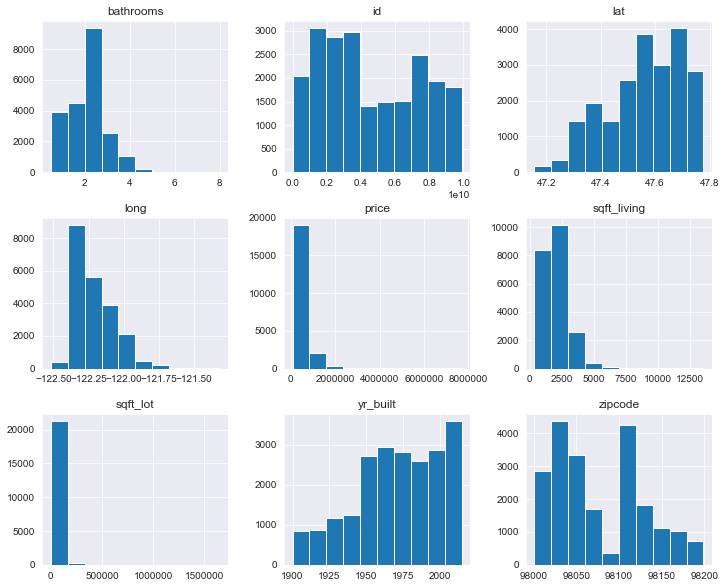

In [352]:
df_continuous.hist(figsize = (12,10))

In [353]:
df_categorical = df.loc[:, categorical]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb342765be0>,
      dtype=object)

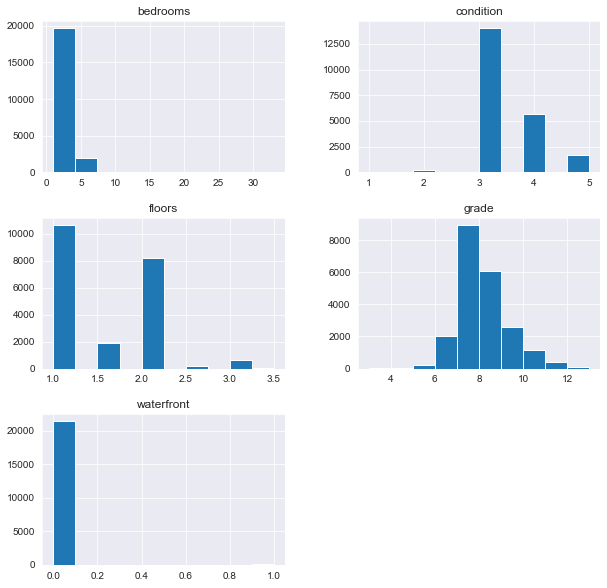

In [354]:
df_categorical.hist(figsize = (10,10))

In [355]:
#
# try to clean up bedrooms

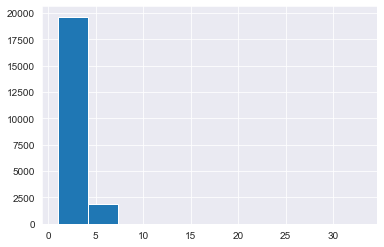

In [356]:
df.bedrooms.hist()

In [357]:
df.bedrooms.unique()


array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33])

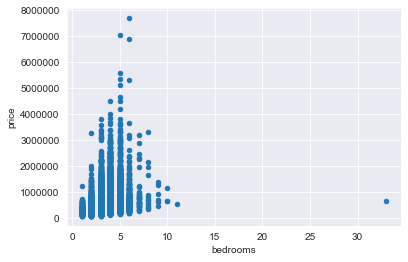

In [358]:
df.plot.scatter(x = 'bedrooms', y = 'price')

In [359]:
df_continuous.nunique()

id             21420
date             372
price           3622
bathrooms         29
sqft_living     1034
sqft_lot        9776
yr_built         116
zipcode           70
lat             5033
long             751
dtype: int64

In [360]:
df_categorical.nunique()

bedrooms      12
floors         6
waterfront     2
condition      5
grade         11
dtype: int64

In [361]:
df_cont = df[continuous]

In [362]:
df_cat = df[categorical]

In [363]:
df_cont

,id,date,price,bathrooms,sqft_living,sqft_lot,yr_built,zipcode,lat,long
0,7129300520,10/13/2014,221900.0,1.00,1180,5650,1955,98178,47.5112,-122.257
1,6414100192,12/9/2014,538000.0,2.25,2570,7242,1951,98125,47.7210,-122.319
2,5631500400,2/25/2015,180000.0,1.00,770,10000,1933,98028,47.7379,-122.233
3,2487200875,12/9/2014,604000.0,3.00,1960,5000,1965,98136,47.5208,-122.393
4,1954400510,2/18/2015,510000.0,2.00,1680,8080,1987,98074,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,2.50,1530,1131,2009,98103,47.6993,-122.346
21593,6600060120,2/23/2015,400000.0,2.50,2310,5813,2014,98146,47.5107,-122.362
21594,1523300141,6/23/2014,402101.0,0.75,1020,1350,2009,98144,47.5944,-122.299
21595,291310100,1/16/2015,400000.0,2.50,1600,2388,2004,98027,47.5345,-122.069


In [364]:
df_cat


,bedrooms,floors,waterfront,condition,grade
0,3,1.0,0.0,3,7
1,3,2.0,0.0,3,7
2,2,1.0,0.0,3,6
3,4,1.0,0.0,5,7
4,3,1.0,0.0,3,8
...,...,...,...,...,...
21592,3,3.0,0.0,3,8
21593,4,2.0,0.0,3,8
21594,2,2.0,0.0,3,7
21595,3,2.0,0.0,3,8


In [365]:
df_zipcodes.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,lat_long,sector
0,7.129301e+09,10/13/2014,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,3.0,...,0,0,0,0,1,0,0,0,"(47.5112, -122.257)",sector_1
1,6.414100e+09,12/9/2014,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,3.0,...,0,0,0,0,0,0,0,0,"(47.721000000000004, -122.319)",sector_1
2,5.631500e+09,2/25/2015,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,3.0,...,0,0,0,0,0,0,0,0,"(47.7379, -122.23299999999999)",sector_1
3,2.487201e+09,12/9/2014,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,5.0,...,0,0,0,0,0,0,0,0,"(47.5208, -122.39299999999999)",sector_1
4,1.954401e+09,2/18/2015,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,3.0,...,0,0,0,0,0,0,0,0,"(47.6168, -122.045)",sector_2


In [366]:
df_original.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [367]:
df_original.zipcode.head()

0    98178
1    98125
2    98028
3    98136
4    98074
Name: zipcode, dtype: int64